## 0): Libs

In [1]:
import numpy as np
import pandas as pd

import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import dask.dataframe as dd
from sklearn.preprocessing import StandardScaler


In [2]:
from IPython.core.display import display, HTML
display(HTML('<style> .container {width:100% !important} </style>'))

/tmp/ipykernel_30846/669428445.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## 1): Data Understanding

In [3]:
fp_1 = "Product Hierarchy.xlsx"
fp_2 = "Sales Invoice 2022.csv"
fp_3 = "Working table sales data dump for year 2022.xlsx"

In [4]:
product_hierarchy = pd.read_excel(fp_1)
product_hierarchy.columns = product_hierarchy.iloc[0]

sales_invoice = pd.read_csv(fp_2, low_memory=False)
sales_data = pd.read_excel(fp_3)

In [5]:
product_hierarchy = product_hierarchy.iloc[1:]

## 3): Data Wrangling

<center> <strong>========================================[ All 3-Datasets ]===================================================</strong> </center>

#### 3.1): Detailed Understanding of data

In [6]:
## Total records in all 3 datasets

print(f"Total records in Product Hierarchy: ==> ", product_hierarchy.shape[0])
print(f"Total records in Sales Invoice: ==>", sales_invoice.shape[0] )
print(f"Total records in Sales Data: ==> ", sales_data.shape[0])

Total records in Product Hierarchy: ==>  9973
Total records in Sales Invoice: ==> 211709
Total records in Sales Data: ==>  13955


In [7]:
### Duplicate values in all 3-datasets

print(f"Total duplicated values in Product Hierarchy: ==> ", product_hierarchy.duplicated().sum())
print(f"Total duplicated values in Sales Invoice: ==> ", sales_invoice.duplicated().sum())
print(f"Total duplicated values in Sales Data: ==> ", sales_data.duplicated().sum())

Total duplicated values in Product Hierarchy: ==>  0
Total duplicated values in Sales Invoice: ==>  0
Total duplicated values in Sales Data: ==>  0


In [8]:
## Checking missing values in all 3 datasets

## 1): Product Hierarchy
product_hierarchy.isnull().sum()

0
Product SKU                     0
Description                     0
UPC                          5461
UCC14                        5465
Brand Category               5461
Brand                           0
Brand Code                     17
Sub Brand                       0
Sub Brand Code                230
Planning Item                5463
Category                        0
Item Number                     0
Configuration                   0
Format                          0
Status                          0
Company                         0
Size                            0
Country                         0
Flavor                          0
Created Date                    0
Base Item Number             5461
Product Group                   0
Product Class                   6
Reservation Hierarchy          27
Shelf Life Period in Days       4
Milk Type                       4
Is Kit                          0
Default Warehouse            5457
First Sale Date *D365*       6763
Last Sale Da

In [9]:
## 2): Sales invoice: 
sales_invoice.isnull().sum()

InvoiceYear           0
InvoiceMonth          0
Company               0
Currency              0
CustomerNumber        0
                  ...  
FulFilmentDate    32153
RSD                   0
MAB                   0
UniqueProduct       138
$FileName             0
Length: 66, dtype: int64

In [10]:
## 3): Sales data
sales_data.isnull().sum()

WORKIDMAIN                        0
ACTUALTIMEMAIN                    0
WAREHOUSE                         0
TARGETLICENSEPLATEID           1821
MULTIPLESKU                       0
CREATEDDATEANDTIMEMAIN            0
CLOSEDWORKMAIN                    0
WORKINPROCESSMAIN                 0
WORKSTATUSMAIN                    0
COMPANYMAIN                       0
WORKORDERTYPEMAIN                 0
USERIDMAIN                     1613
ACTUALTIME                        0
CONTAINERID                   13955
DIMENSIONNUMBER                   0
INVENTORYQUANTITYREMAINING        0
INVENTORYWORKQUANTITY             0
LOTID                          4965
ITEMNUMBER                     3106
CONFIGID                       4863
LINENUMBER                        0
LOADID                         1857
LOCATEDLICENSEPLATEID         13955
ORDERNUMBER                    1857
REMAININGQUANTITY                 0
WORKQUANTITY                      0
SHIPMENTID                     1857
SKIPPED                     

**Interpretaion**

    The datasets contains alot of missing values. These values will effect the analysis of the project.

#### 3.2): Filtering

In [11]:
#### Product Hierarchy, Sales Invoice, and Sales Data Filtering
def filtering(df):
    return df.rename(columns={col:col.lower().replace(" ", "_") for col in df.columns.values.tolist()})

In [12]:
product_hierarchy = filtering(product_hierarchy)
sales_invoice = filtering(sales_invoice)
sales_data = filtering(sales_data)

print(f"Filtering of all 3-dataset done!")

Filtering of all 3-dataset done!


#### 3.3): Typecasting

In [13]:
### 1): No Typecasting is required for "Product Hierarchy"

### 2): Sales-Data ==> Already Typecasted
sales_data.dtypes

workidmain                            object
actualtimemain                         int64
warehouse                             object
targetlicenseplateid                  object
multiplesku                            int64
createddateandtimemain        datetime64[ns]
closedworkmain                datetime64[ns]
workinprocessmain             datetime64[ns]
workstatusmain                         int64
companymain                            int64
workordertypemain                      int64
useridmain                            object
actualtime                             int64
containerid                          float64
dimensionnumber                       object
inventoryquantityremaining             int64
inventoryworkquantity                  int64
lotid                                 object
itemnumber                            object
configid                              object
linenumber                             int64
loadid                                object
locatedlic

In [14]:
### 3): Typecasting Sales Invoice

sales_invoice['deliverydate'] = pd.to_datetime(sales_invoice['deliverydate'])
sales_invoice['fulfilmentdate'] = pd.to_datetime(sales_invoice['fulfilmentdate'])
sales_invoice['rsd'] = pd.to_datetime(sales_invoice['rsd'])
sales_invoice['mab'] = pd.to_datetime(sales_invoice['mab'])

print(f"Type casting for Sales Invoice is Done!")

Type casting for Sales Invoice is Done!


In [15]:
# check the typecasted features

sales_invoice[['deliverydate', 'fulfilmentdate', 'rsd', 'mab']].dtypes

deliverydate      datetime64[ns]
fulfilmentdate    datetime64[ns]
rsd               datetime64[ns]
mab               datetime64[ns]
dtype: object

#### 3.4): Transformation
    
      Due to enormous amount of missing values/poor quality data, we cannot transform the data.

#### 3.5): Imputing and Handling Missing & Duplicated values

In [16]:
## 1): Duplicated values
    ## Since the dataset does not have any duplicated values. We will leave it as it is.

In [17]:
## 2): Handling Missing values

product_hierarchy.fillna(0, inplace=True)
sales_invoice.fillna(0, inplace=True)
sales_data.fillna(0, inplace=True)

print(f"Missing Product Hierarchy done!")
print(f"Missing Sales Invoice done!")
print(f"Missing Sales Data done!")

Missing Product Hierarchy done!
Missing Sales Invoice done!
Missing Sales Data done!


In [18]:
## re-checking the missing values in all 3-dataset

if (sum(product_hierarchy.isnull().sum()) > 0) or (sum(sales_invoice.isnull().sum()) > 0) or (sum(sales_data.isnull().sum()) > 0):
    print(f"Datasets contains missing values.")
else:
    print(f"Datasets are ready to be used for analysis!")

Datasets are ready to be used for analysis!


## 4): Analysis and finding hidden patterns

<center> <strong>========================================[ Analysing Dataset ]===================================================</strong> </center>

In [19]:
product_hierarchy['itemnumber'] = product_hierarchy['item_number']

#### 4.1): Combine both dataset

In [20]:
comb_1 = product_hierarchy.merge(sales_data, on='itemnumber')

In [21]:
# get the common columns
common_columns = set(sales_invoice.columns) & set(comb_1.columns)

# convert the common columns set to a list
common_columns = list(common_columns)

In [22]:
common_columns

['warehouse', 'linenumber', 'itemnumber']

In [23]:
df1 = comb_1.iloc[:20000, :]
df2 = sales_invoice.iloc[:20000, :]

In [24]:
combined_data = df1.merge(df2, on=['itemnumber', 'warehouse', 'linenumber'])

/usr/lib/python3/dist-packages/pandas/core/reshape/merge.py:1214: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


In [25]:
# saving the combined dataset
combined_data.to_csv('Combined Data.csv')
print(f"Data saved successfully!")

Data saved successfully!


In [26]:
# combined data sampled

combined_data.sample(frac=1).head(10)

,product_sku,description,upc,ucc14,brand_category,brand,brand_code,sub_brand,sub_brand_code,planning_item,...,inventreftransid,inventtransid,intercompanyinventtransid,packingslipid,deliverydate,fulfilmentdate,rsd,mab,uniqueproduct,$filename
45740,SKU0000774,SKU0000774 (N000005636:Base) - Purely Inspired...,631656603804,80631656603800,Protein,PURELY INSPIRED,112,PI ORGANIC PROTEIN,112022,PI ORGANIC PROTEIN 1.5 LBS,...,LOT1574996,LOT1574995,0.0,PPS0102604,2022-01-19 00:00:00,2022-01-19 15:41:33,2022-01-19,1900-01-01,303 - SKU0000774,SalesInvoiceLines_2019_2022
3057,SKRCS-TPI-17-0-US,SKRCS-TPI-17-0-US (N000000807:Base) - Purely I...,631656006940,50631656006945,Merchandise,MUSCLEGEAR_Brand,107,MUSCLEGEAR_SUBBRAND,107001,MUSCLEGEAR NOTAPPLIED,...,LOT1731174,LOT1731173,0.0,PPS0118180,2022-05-16 00:00:00,2022-05-16 13:32:54,2022-05-16,1900-01-01,303 - SKRCS-TPI-17-0-US,SalesInvoiceLines_2019_2022
33078,HYGU8-090-MF-0-US,HYGU8-090-MF-0-US (N000001269:V8) - Hydroxycut...,631656607581,80631656607587,Weight Management,HYDROXYCUT,103,HYD GUMMIES,103016,HYD GUMMIES 90 COUNT,...,LOT1841592,LOT1841591,0.0,PPS0132312,2022-08-12 00:00:00,2022-08-12 13:04:55,2022-08-12,1900-01-01,303 - SKU0001748,SalesInvoiceLines_2019_2022
44705,SSHYD-050-WM-0-US,SSHYD-050-WM-0-US (N000004966:Base) - Six Star...,631656714296,20631656714290,Intra/Post-Workout,SIX STAR,113,SS HYDRATION,113056,SS HYDRATION 50 SERV,...,LOT1909682,LOT1909681,0.0,PPS0139901,2022-10-04 00:00:00,2022-10-04 15:15:28,2022-10-04,1900-01-01,303 - SSHYD-050-WM-0-US,SalesInvoiceLines_2019_2022
53877,SKU0001519,SKU0001519 (N000009675:Base) - Purely Inspired...,631656716474,20631656716478,Health & Beauty,PURELY INSPIRED,112,PI BEET ROOT POWDER,112053,PI BEET ROOT POWDER 32 SERV,...,LOT1731209,LOT1731208,0.0,PPS0118180,2022-05-16 00:00:00,2022-05-16 13:32:54,2022-05-16,1900-01-01,303 - SKU0001519,SalesInvoiceLines_2019_2022
45192,SKU0002189,SKU0002189 (N000004966:V2) - Six Star Ultimate...,631656714296,20631656714290,Intra/Post-Workout,SIX STAR,113,SS HYDRATION,113056,SS HYDRATION 50 SERV,...,LOT1913922,LOT1913921,0.0,PPS0140575,2022-10-11 00:00:00,2022-10-11 12:36:15,2022-10-07,1900-01-01,303 - SSHYD-050-WM-0-US,SalesInvoiceLines_2019_2022
3294,SKRCS-TPI-17-0-US,SKRCS-TPI-17-0-US (N000000807:Base) - Purely I...,631656006940,50631656006945,Merchandise,MUSCLEGEAR_Brand,107,MUSCLEGEAR_SUBBRAND,107001,MUSCLEGEAR NOTAPPLIED,...,LOT1898400,LOT1898399,0.0,PPS0139144,2022-09-27 00:00:00,2022-09-27 16:18:09,2022-09-27,1900-01-01,303 - SKRCS-TPI-17-0-US,SalesInvoiceLines_2019_2022
31962,HYGU7-090-MF-2-US,HYGU7-090-MF-2-US (N000001269:V7-2) - Hydroxyc...,631656607581,80631656607587,Weight Management,HYDROXYCUT,103,HYD GUMMIES,103016,HYD GUMMIES 90 COUNT,...,LOT1841592,LOT1841591,0.0,PPS0132312,2022-08-12 00:00:00,2022-08-12 13:04:55,2022-08-12,1900-01-01,303 - SKU0001748,SalesInvoiceLines_2019_2022
41551,SSCR5-060-00-0-US,SSCR5-060-00-0-US (N000001346:V5) - Six Star E...,631656602630,10631656602637,Intra/Post-Workout,SIX STAR,113,SS CREATINE X3 PILLS,113010,SS CREATINE X3 PILLS 60 COUNT,...,LOT1914054,LOT1914053,0.0,PPS0140572,2022-10-11 00:00:00,2022-10-11 12:25:43,2022-10-07,1900-01-01,303 - SSCR7-060-00-0-US,SalesInvoiceLines_2019_2022
42249,SSCR3-060-00-0-US,SSCR3-060-00-0-US (N000001346:V3) - Six Star E...,631656602630,10631656602637,Intra/Post-Workout,SIX STAR,113,SS CREATINE X3 PILLS,113010,SS CREATINE X3 PILLS 60 COUNT,...,LOT1913298,LOT1913297,0.0,PPS0140419,2022-10-10 00:00:00,2022-10-10 15:34:19,2022-10-06,1900-01-01,303 - SSCR7-060-00-0-US,SalesInvoiceLines_2019_2022


#### 4.2): Descriptive stats

In [27]:
combined_data.describe()

,shelf_life_period_in_days,case_to_each,pallet_to_case,pallet_to_each,pallet_to_layer,layer_to_case,product_width,product_length,product_height,net_weight,...,pltoeach,catoeach,palletcount,casecount,deliveryabl,custgroup,customerprice,customerlinenum,lineseq,intercompanyinventtransid
count,55368.000000,55368.000000,55368.000000,55368.000000,55368.000000,55368.000000,55368.000000,55368.000000,55368.000000,55368.000000,...,55368.000000,55368.000000,55368.000000,55368.000000,5.536800e+04,55368.0,55368.0,55368.0,5.536800e+04,55368.0
mean,829.578096,14.286429,109.838770,1020.192566,6.141779,17.980277,3.119067,3.287175,5.508485,0.705895,...,1020.192566,14.286429,0.001687,0.209112,5.638010e+09,30.0,0.0,0.0,8.721350e+08,0.0
std,306.490014,17.489204,40.630674,424.263549,1.152590,7.635598,1.354195,1.380730,2.000446,0.813921,...,424.263549,17.489204,0.002156,0.339707,1.531557e+05,0.0,0.0,0.0,6.878140e+08,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,5.637161e+09,30.0,0.0,0.0,1.000000e+00,0.0
25%,730.000000,6.000000,90.000000,840.000000,5.000000,15.000000,2.600000,2.600000,5.320000,0.240000,...,840.000000,6.000000,0.000850,0.083333,5.638019e+09,30.0,0.0,0.0,1.774476e+08,0.0
50%,730.000000,12.000000,98.000000,1080.000000,6.000000,15.000000,3.058000,3.058000,5.500000,0.660000,...,1080.000000,12.000000,0.000925,0.083333,5.638046e+09,30.0,0.0,0.0,7.120455e+08,0.0
75%,1095.000000,12.000000,133.000000,1176.000000,7.000000,19.000000,3.690000,3.690000,5.625000,0.660000,...,1176.000000,12.000000,0.001736,0.166666,5.638092e+09,30.0,0.0,0.0,1.557477e+09,0.0
max,1095.000000,125.000000,186.000000,7500.000000,9.000000,36.000000,8.070000,14.000000,17.810000,15.300000,...,7500.000000,125.000000,0.066666,10.000000,5.638148e+09,30.0,0.0,0.0,2.131899e+09,0.0


#### 4.3): Counting unique values in each columns¶

In [28]:
# count the number of unique values in each categorical column
print(f"Unique values in each Columns:\n")
for col in combined_data.columns:
    if combined_data[col].dtype == 'object':
        print(f"{col}: ====> [{combined_data[col].nunique()}] unique values")

Unique values in each Columns:

product_sku: ====> [180] unique values
description: ====> [180] unique values
upc: ====> [96] unique values
ucc14: ====> [99] unique values
brand_category: ====> [6] unique values
brand: ====> [6] unique values
brand_code: ====> [6] unique values
sub_brand: ====> [52] unique values
sub_brand_code: ====> [52] unique values
planning_item: ====> [62] unique values
category: ====> [3] unique values
item_number: ====> [95] unique values
configuration: ====> [28] unique values
format: ====> [8] unique values
status: ====> [5] unique values
company_x: ====> [2] unique values
size: ====> [41] unique values
country: ====> [1] unique values
flavor: ====> [26] unique values
base_item_number: ====> [89] unique values
product_group: ====> [6] unique values
product_class: ====> [2] unique values
reservation_hierarchy: ====> [2] unique values
milk_type: ====> [2] unique values
is_kit: ====> [1] unique values
default_warehouse: ====> [5] unique values
first_sale_date_*d

#### 4.4): Calculating the mean of "Brand"

In [29]:
grouped_brand_mean = combined_data.groupby(by='brand').mean()
grouped_brand_mean

,shelf_life_period_in_days,case_to_each,pallet_to_case,pallet_to_each,pallet_to_layer,layer_to_case,product_width,product_length,product_height,net_weight,...,pltoeach,catoeach,palletcount,casecount,deliveryabl,custgroup,customerprice,customerlinenum,lineseq,intercompanyinventtransid
brand,,,,,,,,,,,,,,,,,,,,,
HYDROXYCUT,861.029460,12.000000,93.439856,1121.278276,6.373837,14.687449,2.855737,3.208030,5.431019,0.499218,...,1121.278276,12.000000,0.000969,0.091018,5.637987e+09,30.0,0.0,0.0,1.052755e+09,0.0
HYDROXYCUT CUT,487.000000,1.596386,166.789157,252.668675,6.659639,24.939759,6.303193,8.343464,6.329729,7.772530,...,252.668675,1.596386,0.012258,2.111446,5.637744e+09,30.0,0.0,0.0,1.840115e+08,0.0
MUSCLEGEAR_Brand,0.000000,69.569601,16.232871,1124.130963,3.820468,4.774718,0.015611,0.015611,0.001301,0.425091,...,1124.130963,69.569601,0.001252,0.021314,5.638045e+09,30.0,0.0,0.0,8.632763e+08,0.0
MUSCLETECH,854.052288,6.046254,127.806435,799.312217,6.753645,18.919558,4.218512,4.218512,6.396621,1.006526,...,799.312217,6.046254,0.003805,0.376026,5.637894e+09,30.0,0.0,0.0,4.829795e+08,0.0
PURELY INSPIRED,798.382068,3.038743,170.496859,478.474869,5.471859,32.212304,4.538736,4.536380,7.409825,1.224131,...,478.474869,3.038743,0.003330,0.584040,5.637958e+09,30.0,0.0,0.0,4.195764e+08,0.0
SIX STAR,1035.791552,8.613495,129.212624,1135.382575,6.678885,19.742003,3.529005,3.529889,6.167434,0.672550,...,1135.382575,8.613495,0.001647,0.204959,5.638080e+09,30.0,0.0,0.0,8.766936e+08,0.0


#### 4.5): Visualize all the available categories

    Note: Here '0' means, most of the values are missing.

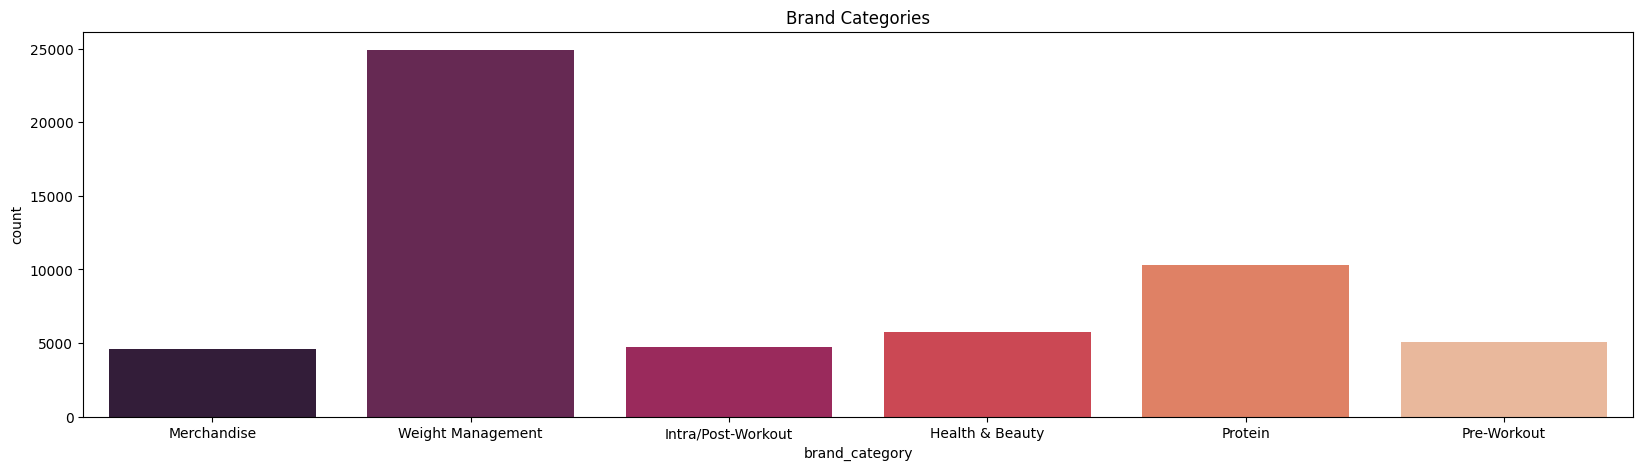

In [30]:
plt.figure(figsize=(20, 5))


sb.countplot(x='brand_category', data=combined_data, palette='rocket')
plt.title('Brand Categories')
plt.show()

#### 4.6): Top 5 most purchased brands

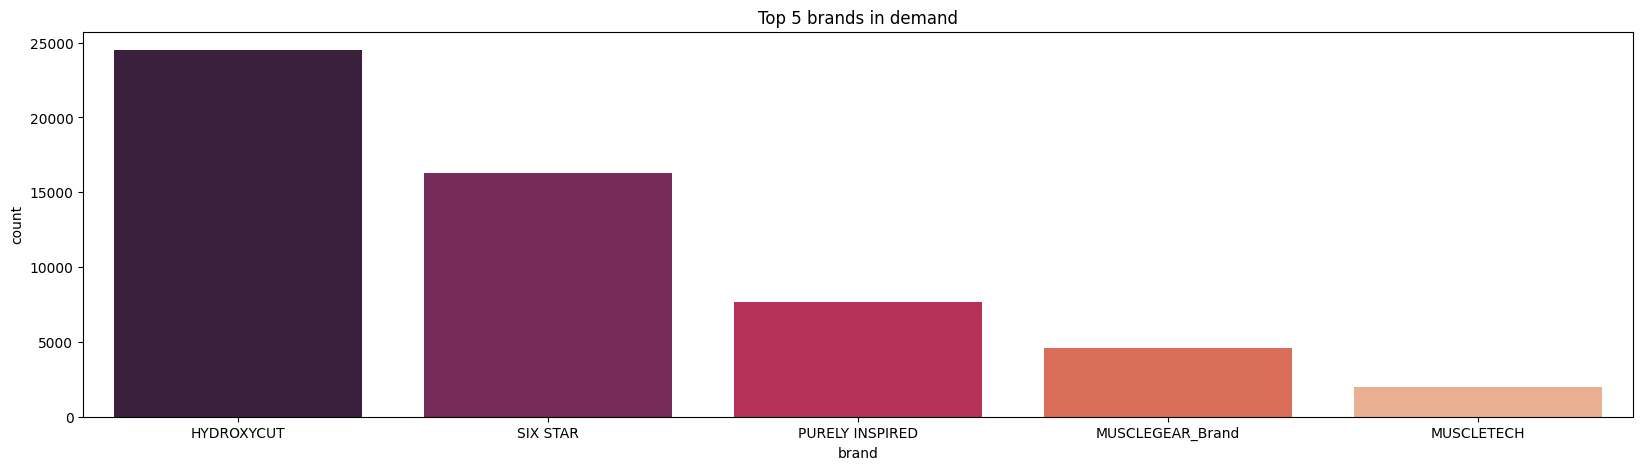

In [31]:
plt.figure(figsize=(20, 5))

sb.countplot(x='brand', order=combined_data['brand'].value_counts().iloc[:5].index, data=combined_data, palette='rocket')
plt.title('Top 5 brands in demand')
plt.show()

#### 4.7): Available stock of brands based on it's categories

In [32]:
brand_cat = combined_data.groupby(['brand'])['brand_category'].count()
brand_cat = pd.DataFrame(brand_cat)
brand_cat = brand_cat.reset_index()

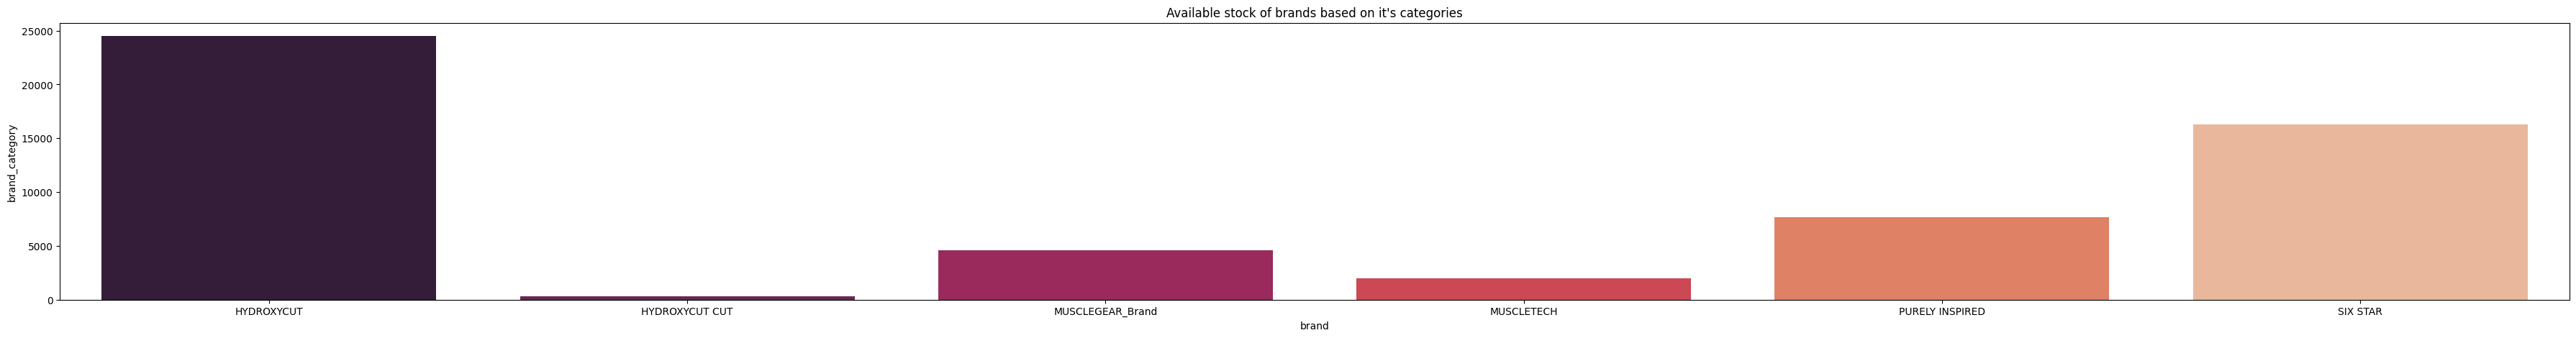

In [33]:
plt.figure(figsize=(45, 5))
sb.barplot(x='brand', y='brand_category', palette='rocket', data=brand_cat)
plt.title('Available stock of brands based on it\'s categories')
plt.show()

#### 4.8): Most brands used by countries

In [34]:
country_brand = combined_data.groupby(['country_of_origin'])['brand'].count()
country_brand = pd.DataFrame(country_brand)
country_brand = country_brand.reset_index()

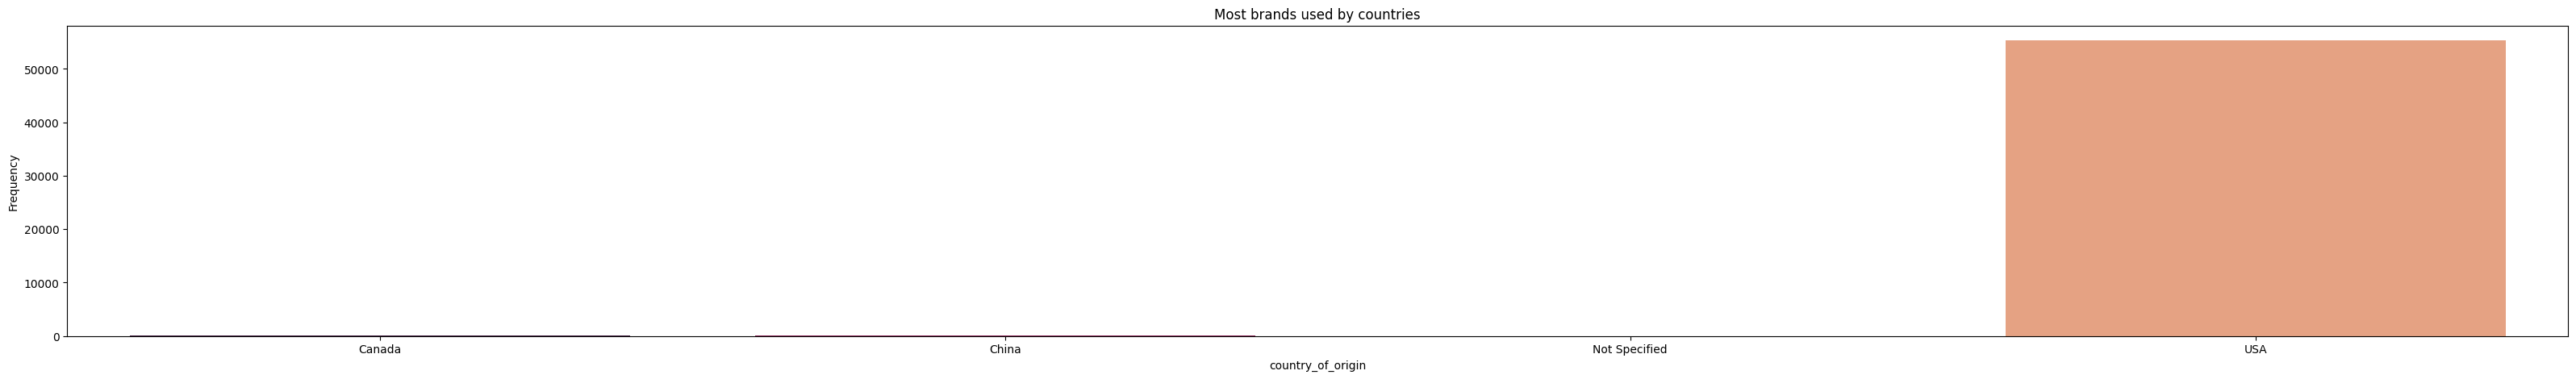

In [35]:
plt.figure(figsize=(40, 5))
sb.barplot(x='country_of_origin', y='brand', palette='rocket', data=country_brand)
plt.title('Most brands used by countries')
plt.ylabel('Frequency')
plt.show()

#### 4.9): Countries purchasing total number of sub-brands of each brand

In [36]:
country_subbrand = combined_data.groupby(['country_of_origin', 'brand'])['sub_brand'].count()
country_subbrand = pd.DataFrame(country_subbrand)
country_subbrand = country_subbrand.reset_index()

# display results
country_subbrand

,country_of_origin,brand,sub_brand
0,Canada,PURELY INSPIRED,7
1,Canada,SIX STAR,6
2,China,MUSCLETECH,21
3,Not Specified,MUSCLEGEAR_Brand,2
4,USA,HYDROXYCUT,24508
5,USA,HYDROXYCUT CUT,332
6,USA,MUSCLEGEAR_Brand,4610
7,USA,MUSCLETECH,1968
8,USA,PURELY INSPIRED,7633
9,USA,SIX STAR,16281


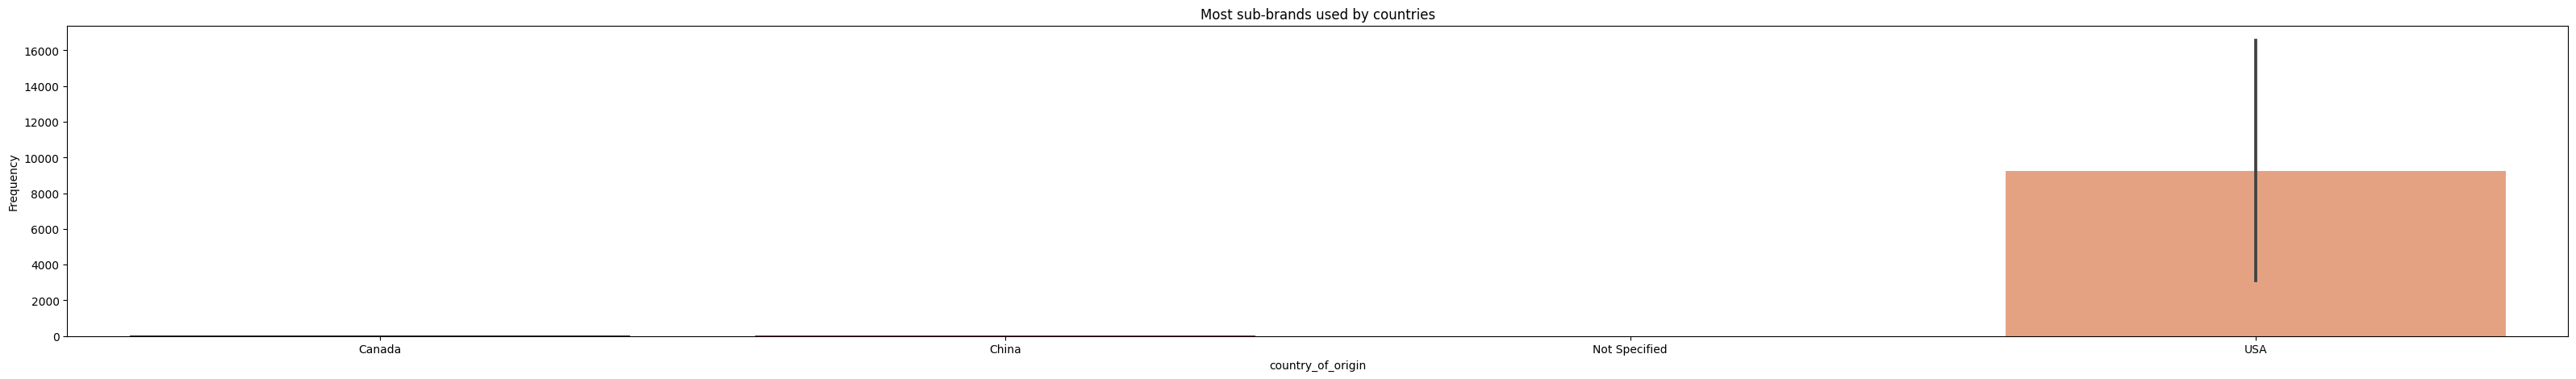

In [37]:
plt.figure(figsize=(40, 5))
sb.barplot(x='country_of_origin', y='sub_brand', palette='rocket', data=country_subbrand)
plt.title('Most sub-brands used by countries')
plt.ylabel('Frequency')
plt.show()

#### 5.0): Finding the correlation among columns

In [38]:
cd = pd.get_dummies(combined_data, columns=["brand_category", "brand", "sub_brand", "category", "format", "status", "company", "country", "flavor", "product_group", "product_class", "milk_type", "country_of_origin"])

In [39]:
numerical_features = ["shelf_life_period_in_days", "product_width", "product_length", "product_height", "net_weight", "gross_weight", "tare_weight", "case_width", "case_length", "case_height", "case_weight", "pallet_width", "pallet_length", "pallet_height", "pallet_weight", "density_(lbs_/_cubic_ft)", "shipping_unit_gw"]
cd[numerical_features] = (cd[numerical_features] - cd[numerical_features].mean()) / cd[numerical_features].std()

/tmp/ipykernel_30846/222888051.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cd[numerical_features] = (cd[numerical_features] - cd[numerical_features].mean()) / cd[numerical_features].std()


In [40]:
corr = cd[numerical_features].fillna(0).corr()

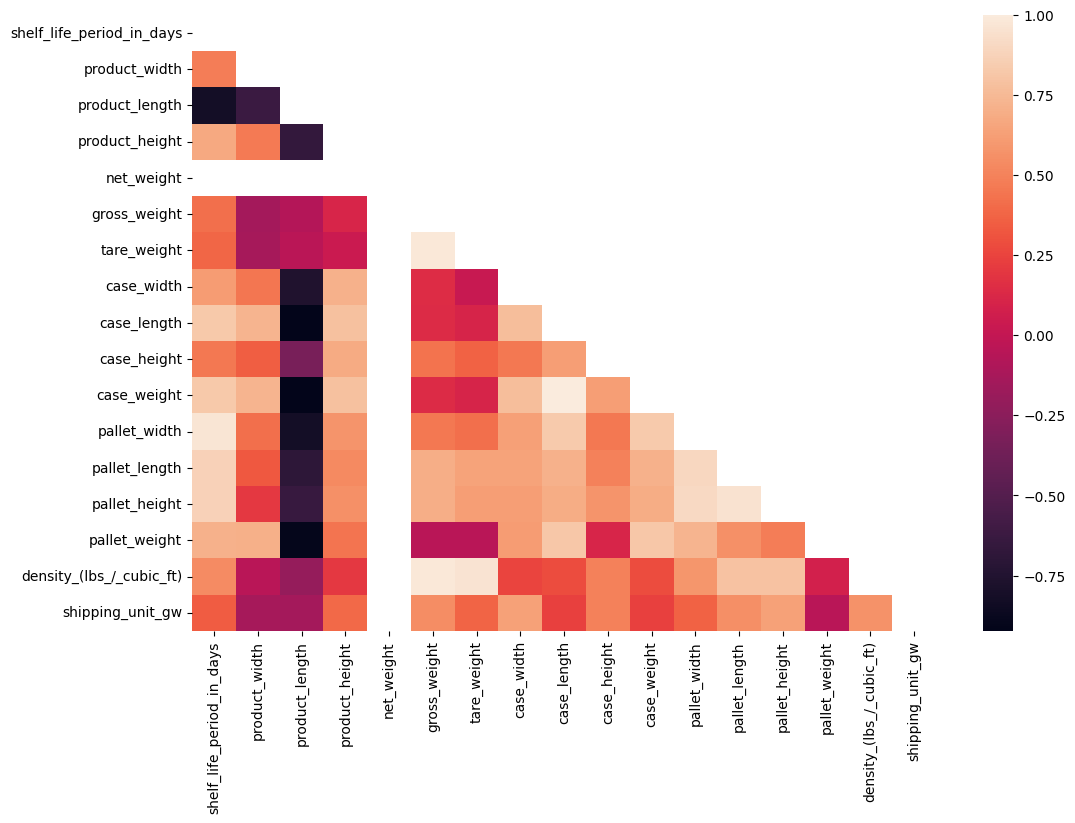

In [41]:
# visualizing the correlation
plt.figure(figsize=(12, 8))

matrix = np.triu(corr)
sb.heatmap(corr, mask=matrix)

plt.show()

#### 5.1): Visualize the data using pairplot to identify the relationships between variables:

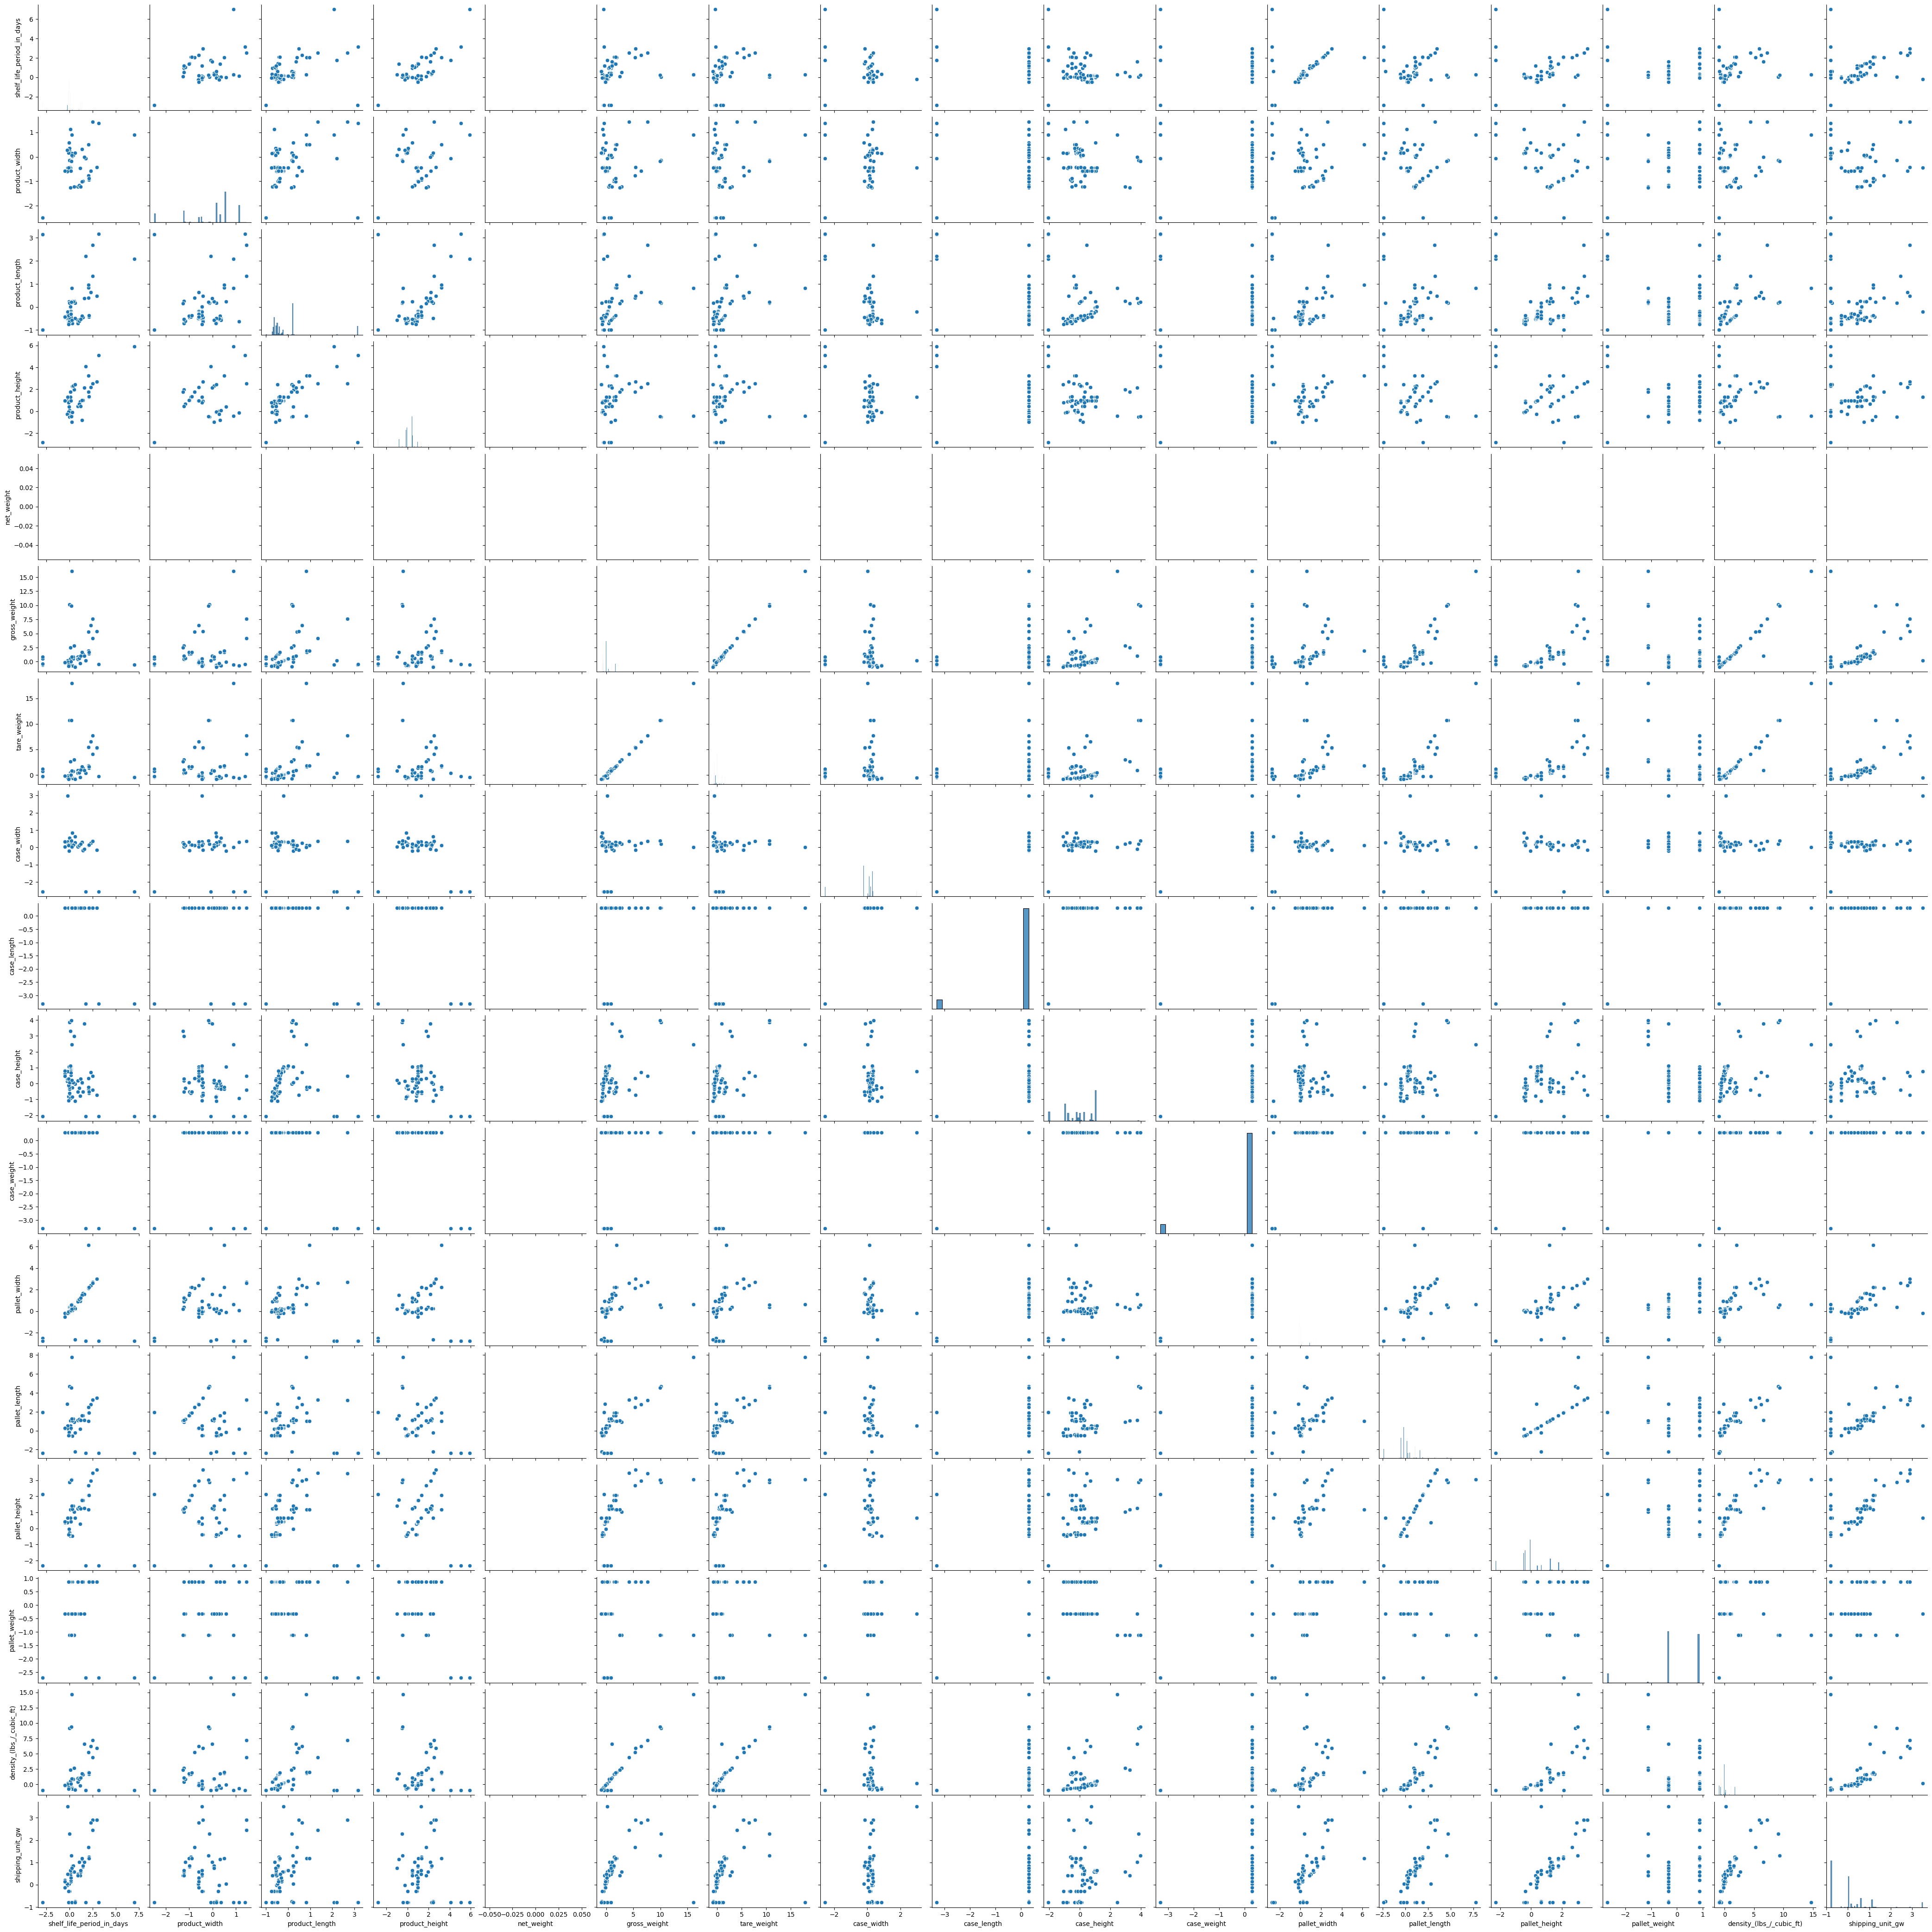

In [42]:
sb.pairplot(cd[numerical_features])
plt.show()

#### 5.2): Product sales over the year

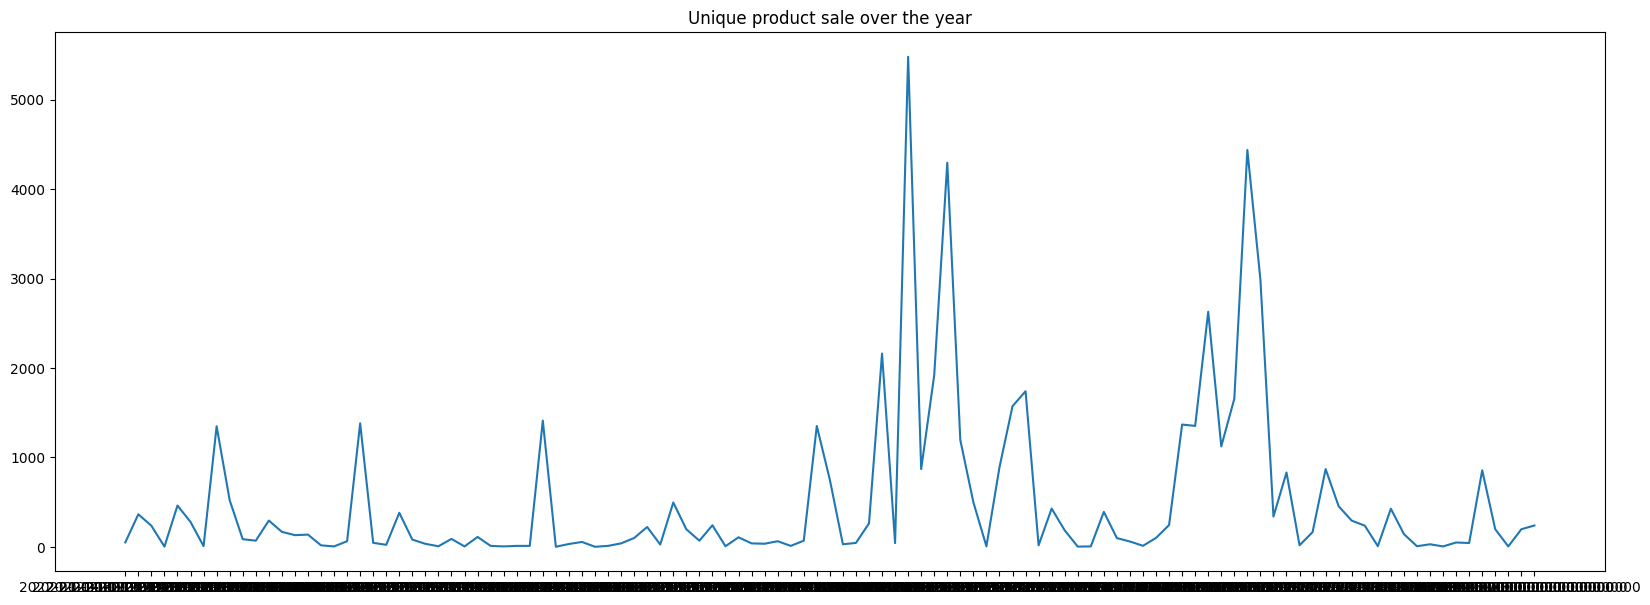

In [43]:
unique_product_sale = combined_data.groupby(['invoicedate'])['uniqueproduct'].count()
unique_product_sale = pd.DataFrame(unique_product_sale)


# visualize
plt.figure(figsize=(20, 7))

plt.plot(unique_product_sale)
plt.title('Unique product sale over the year')

plt.show()

**Interpretation**

    The graph suggests that the product sold have a rough distribution, suggesting that the growth over the year is very less. More specifically the growth is "unpredictable" due to the poor 
    quality data.

#### 5.3): Most sales over the month

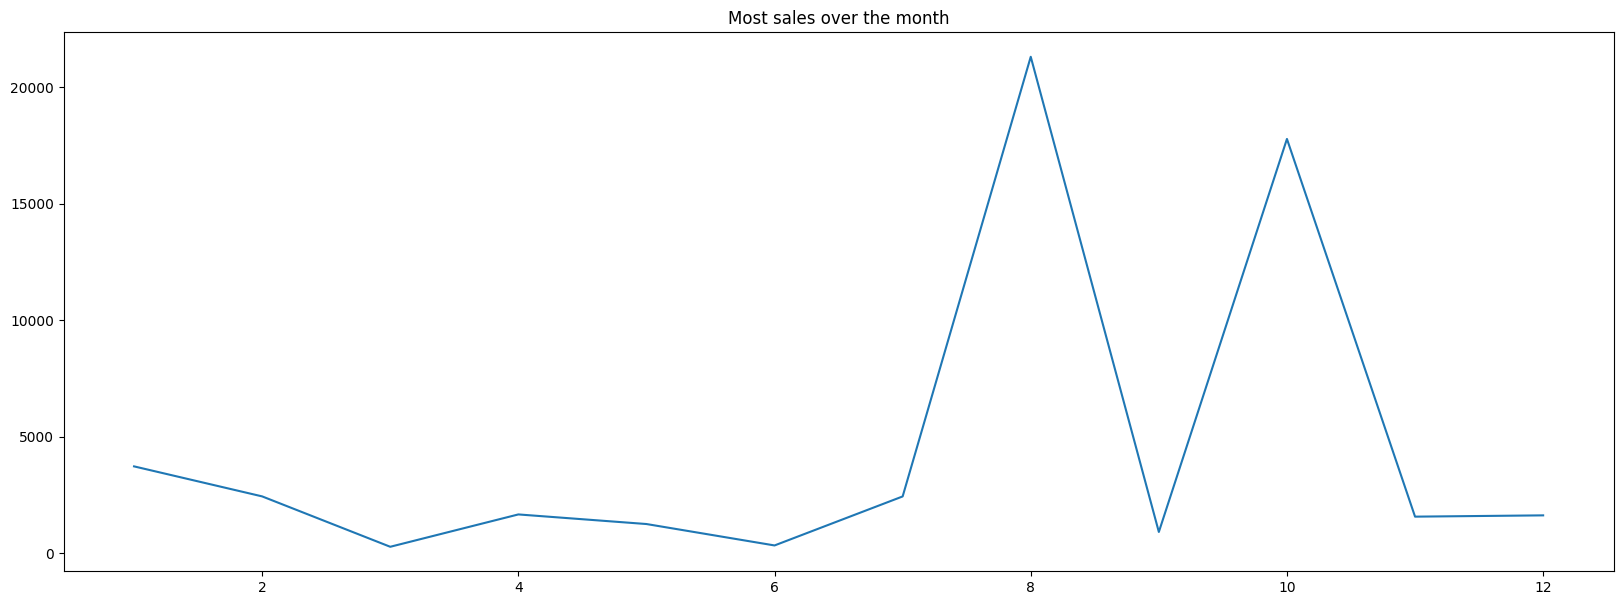

In [44]:
most_sales_over_month = combined_data.groupby(['invoicemonth'])['invoicenumber'].count()
most_sales_over_month = pd.DataFrame(most_sales_over_month)

# visualize 
plt.figure(figsize=(20, 7))

plt.plot(most_sales_over_month)
plt.title('Most sales over the month')

plt.show()

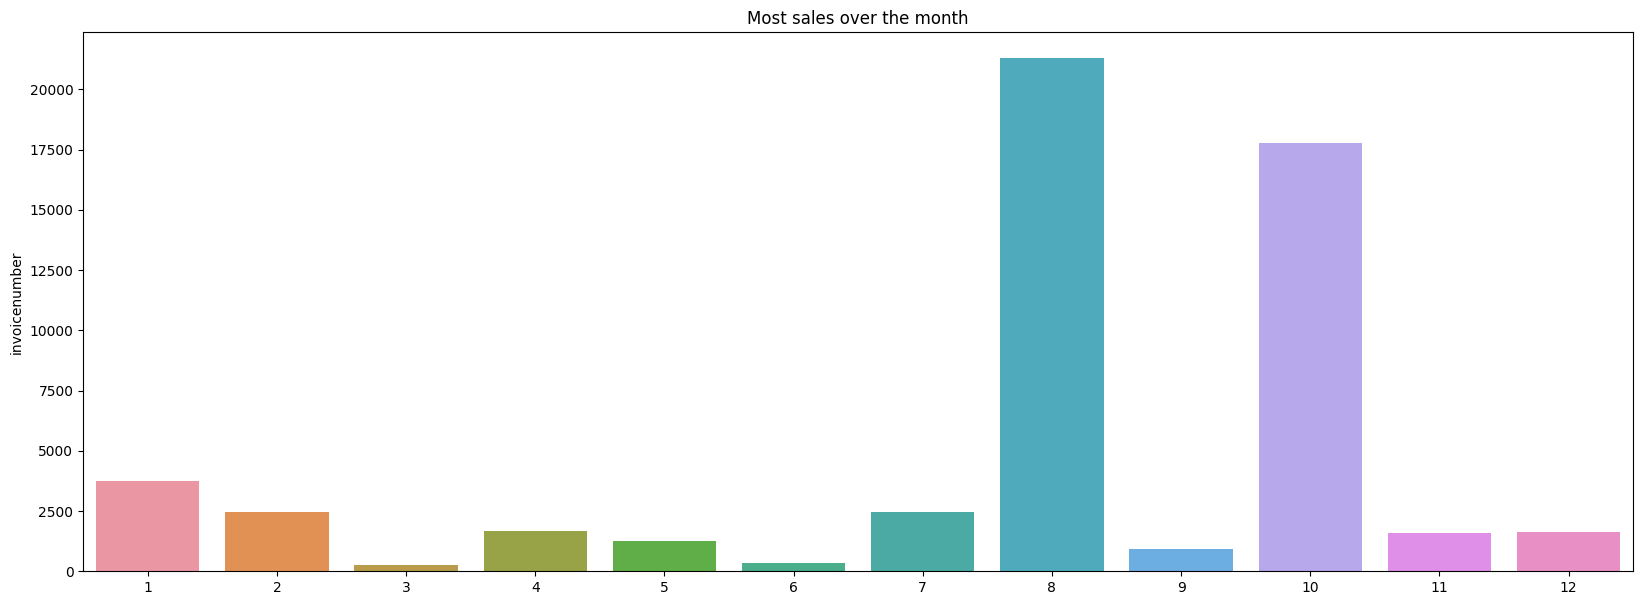

In [45]:
plt.figure(figsize=(20, 7))

sb.barplot(x=most_sales_over_month.index.values.tolist(), y=most_sales_over_month['invoicenumber'], data=most_sales_over_month)
plt.title('Most sales over the month')

plt.show()

**Interpretaions**

    The graph suggest that most sales occur in "Auguts" & "October".

#### 5.4): Warehouse that makes the most sales

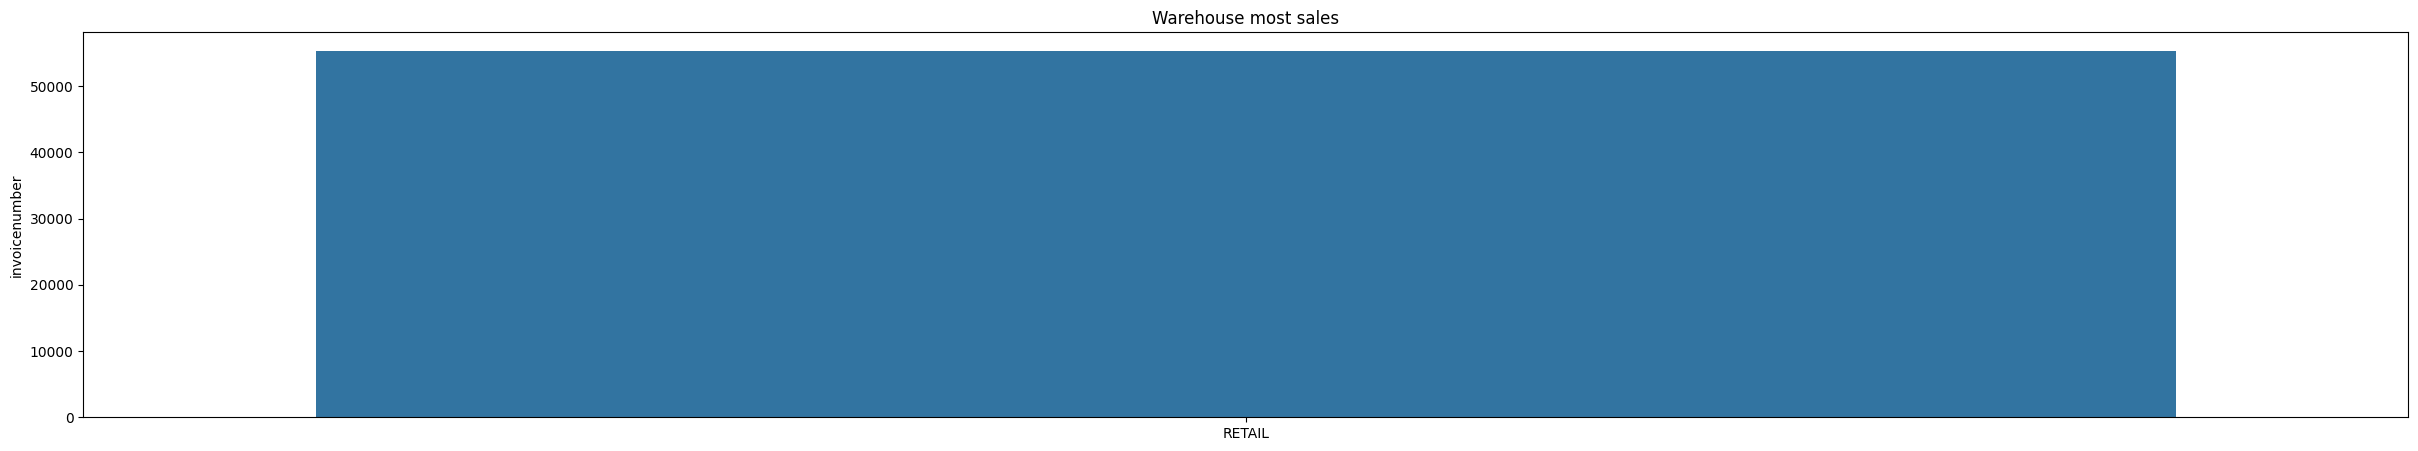

In [46]:
most_sales_warhouse = combined_data.groupby(['warehouse'])['invoicenumber'].count()
most_sales_warhouse = pd.DataFrame(most_sales_warhouse)

# visualize
plt.figure(figsize=(30, 5))

sb.barplot(x=most_sales_warhouse.index.values.tolist(), y=most_sales_warhouse['invoicenumber'], data=most_sales_warhouse)
plt.title('Warehouse most sales')

plt.show()

#### 5.5): Aggregation: Calculate the sum of USDExtdCost by ShipMethod

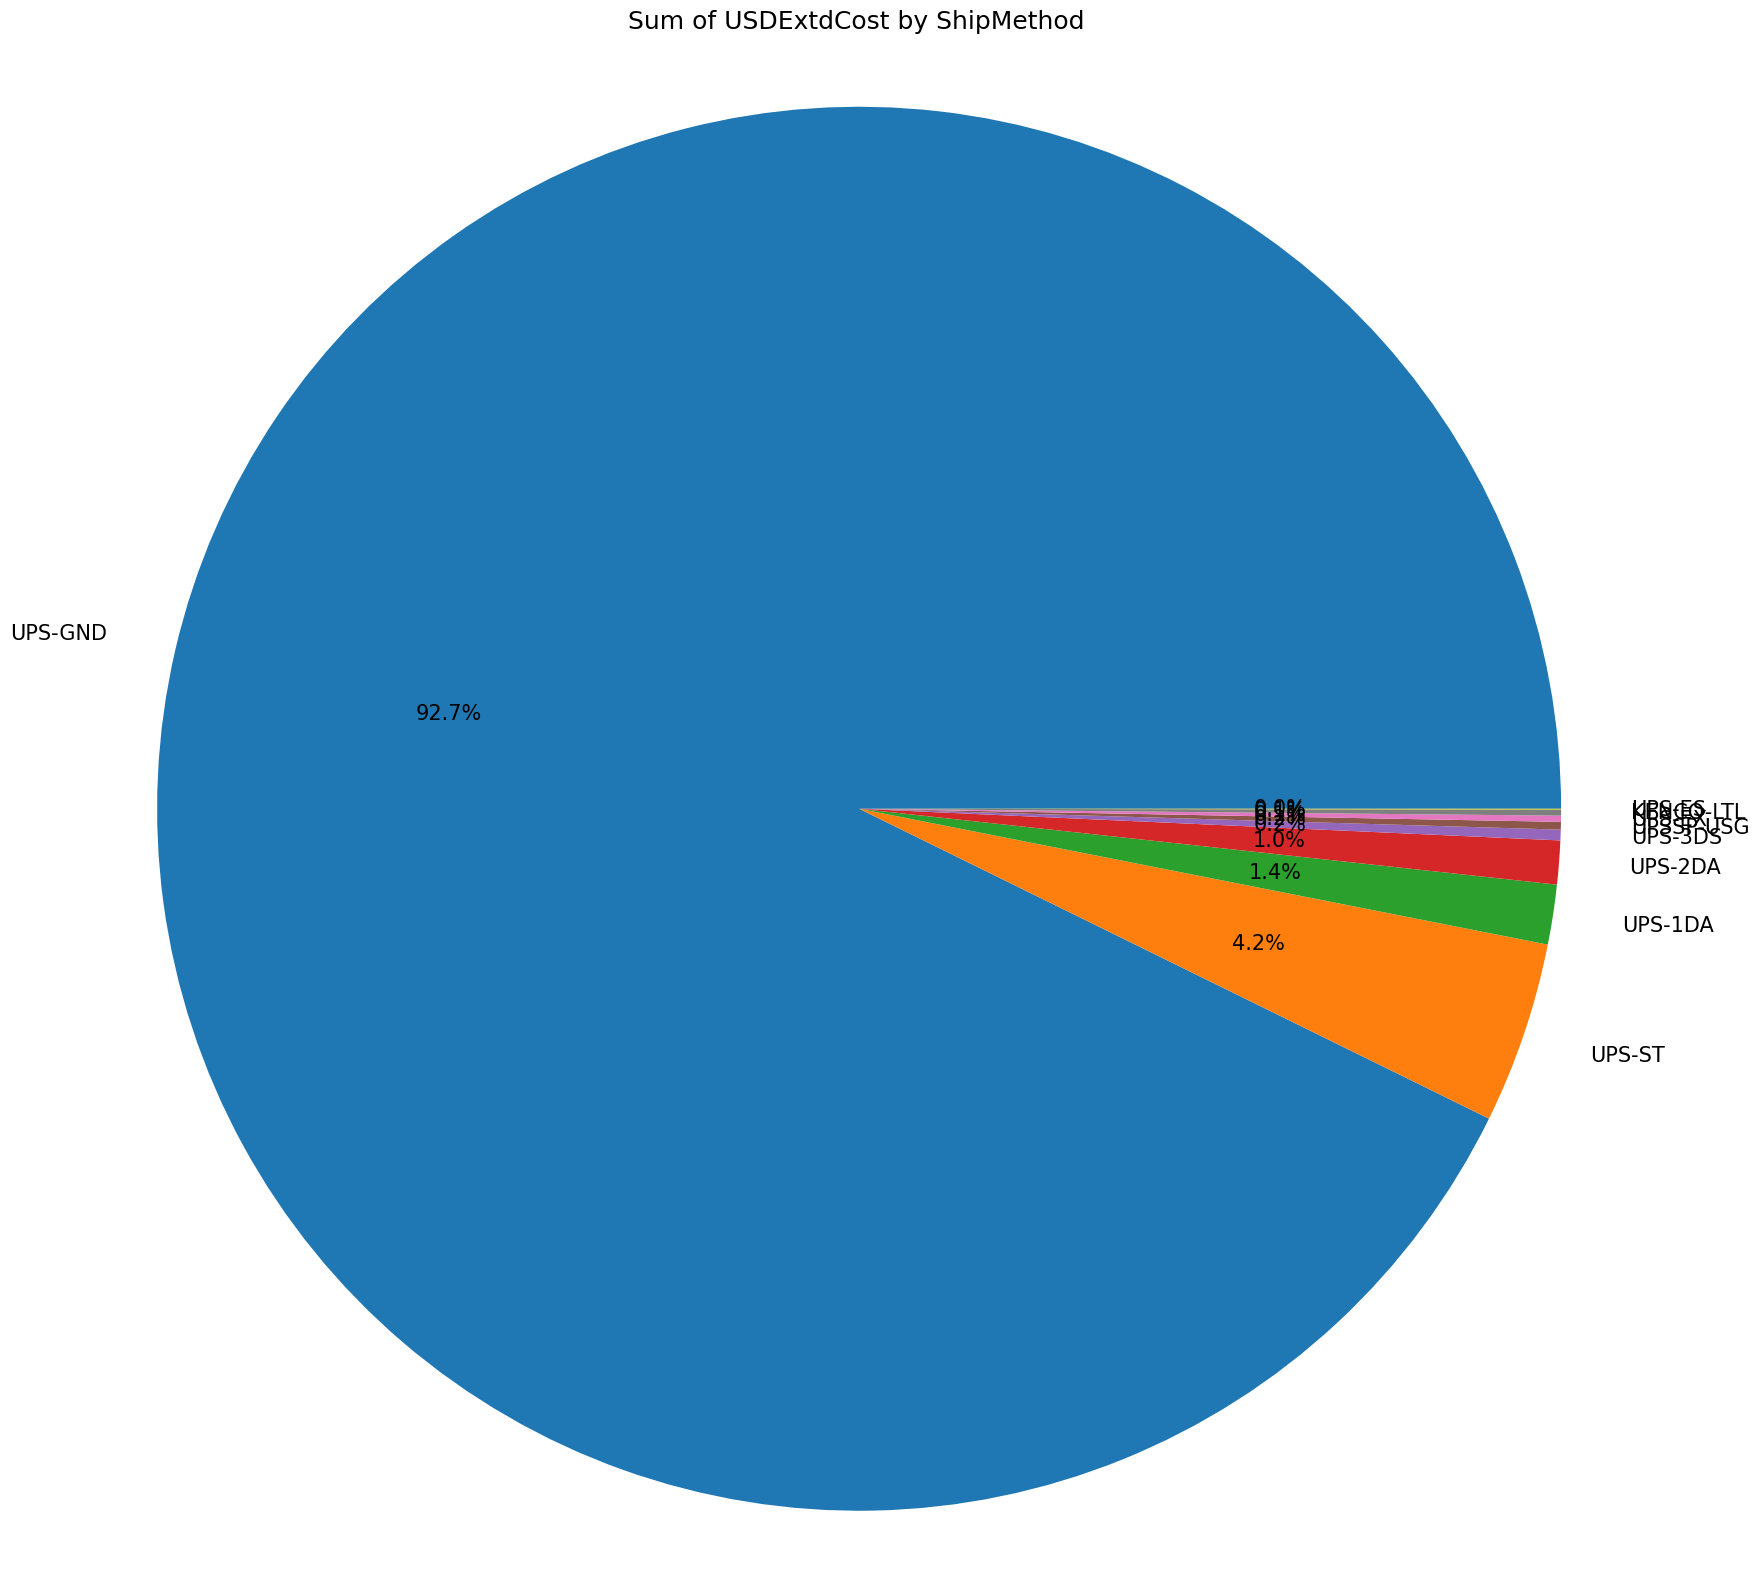

In [47]:
agg_df = combined_data.groupby(['shipmethod'])['usdextdcost'].sum().reset_index()

agg_df = agg_df.sort_values(by='usdextdcost', ascending=False).tail(10)

# visuzlize
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(20, 20))
plt.pie(agg_df['usdextdcost'], labels=agg_df['shipmethod'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Sum of USDExtdCost by ShipMethod')

plt.show()

#### 5.6):  Plot a histogram to show the distribution of actual time

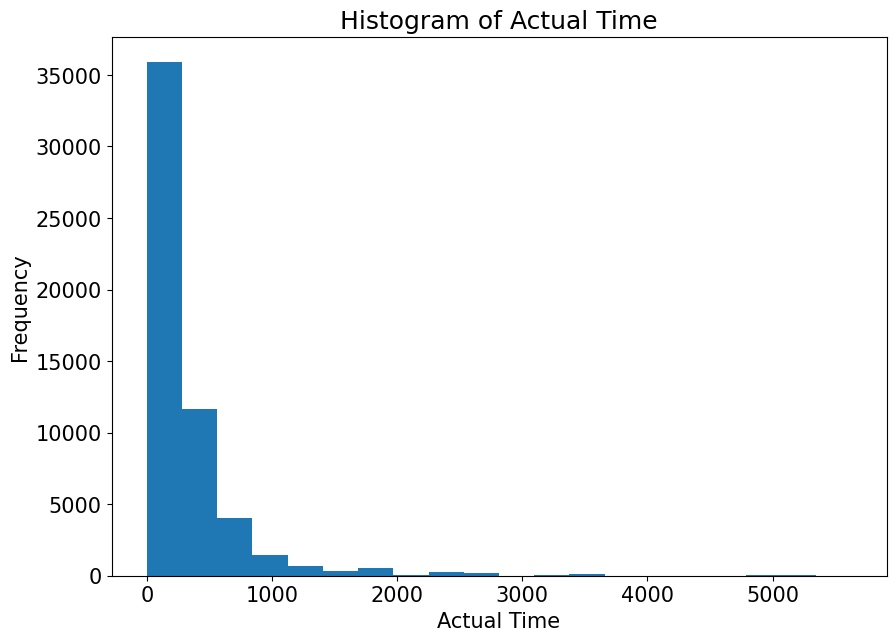

In [48]:
plt.figure(figsize=(10, 7))
plt.hist(combined_data['actualtimemain'], bins=20)
plt.xlabel('Actual Time')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Time')
plt.show()

#### 5.7): Plot a bar chart to show the number of work order types¶

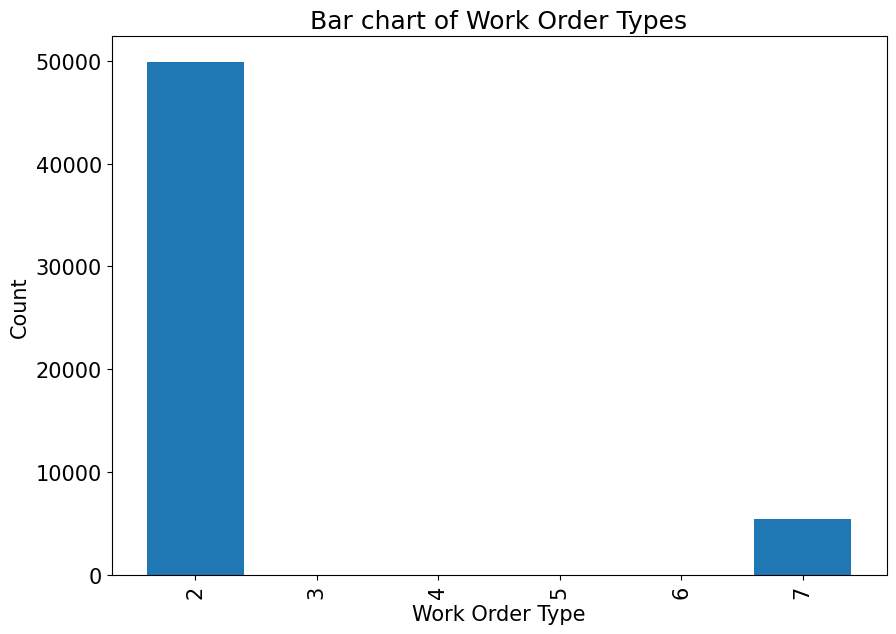

In [49]:
plt.figure(figsize=(10, 7))

plt.bar(combined_data['workordertypemain'].value_counts().index, combined_data['workordertypemain'].value_counts().values)
plt.xlabel('Work Order Type')
plt.ylabel('Count')
plt.title('Bar chart of Work Order Types')
plt.xticks(rotation=90)
plt.show()

#### 5.8): Finding hidden patterns

In [50]:
# Clustering: Group similar products together using k-means clustering
# First, we need to scale the data
X = cd[numerical_features] # independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.fillna(0))


In [51]:
# Then, we perform k-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

# Add the cluster labels to the original data
combined_data['cluster'] = kmeans.labels_

In [52]:
## PCA by reducing the dimensionality

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
pca_result = pd.DataFrame(pca_result, columns=['component1', 'component2'])
pca_result['cluster'] = combined_data['cluster']

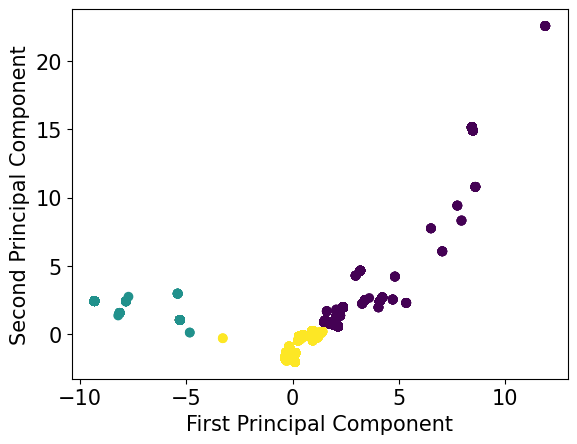

In [53]:
# Plot the first two principal components
plt.scatter(pca_result.iloc[:, 0], pca_result.iloc[:, 1], c=pca_result['cluster'])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

**Interpretation**

    Kmeans is a type of unsupervised machine learning technique used for clustering. It partitions a set of data points into K number of clusters based on their similarity. In this case, the Kmeans algorithm has found 3 clusters, meaning that it has grouped the data points into 3 distinct groups based on their similarities. These groups are differentiated based on the features of data.

The visualization show perfect clustering of entire data. The datapoints outside the cluster show outliers or anomalies in the data.